In [35]:
import pandas as pd
import os
import numpy as np
import json
import requests
import matplotlib.pyplot as plt

In [36]:
원본 = './원본 DATA/'
저장 = './전처리/의료기관/'

In [37]:
의료기관 = pd.read_csv(저장 + '년도별정리.csv', encoding='cp949')

In [38]:
의료기관.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
의료기관

개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호       인허가일자  \
0       의원  01_01_02_P   5350000  PHMA120055350029041100010  2005-03-29   
1       병원  01_01_01_P   5350000  PHMA220095350029021200003  2009-07-02   
2       병원  01_01_01_P   5350000  PHMA220075350029021200002  2007-01-10   
3       의원  01_01_02_P   5350000  PHMA120025350029041100043  2002-11-07   
4       의원  01_01_02_P   5350000  PHMA120065350029041100009  2006-03-29   
..     ...         ...       ...                        ...         ...   
885     병원  01_01_01_P   5350000  PHMA219935350029021200001  1993-09-27   
886     의원  01_01_02_P   5350000  PHMA119655350029041100001  1965-12-04   
887     의원  01_01_02_P   5350000  PHMA119685350029041100001  1968-07-20   
888     의원  01_01_02_P   5350000  PHMA119735350029041100001  1973-06-11   
889     의원  01_01_02_P   5350000  PHMA119945350029041100002  1994-03-30   

     인허가취소일자  영업상태구분코드           영업상태명  상세영업상태코드 상세영업상태명  ... 완화의료지정형태  \
0        NaN         3              폐업         3      폐업  ...      NaN   
1        NaN         4  취소/말소/만료/정지/중지        24    직권폐업  ...      NaN   
2        NaN         3              폐업         3      폐업  ...      NaN   
3        NaN         3              폐업         3      폐업  ...      NaN   
4        NaN         3              폐업         3      폐업  ...      NaN   
..       ...       ...             ...       ...     ...  ...      ...   
885      NaN         3              폐업         3      폐업  ...      NaN   
886      NaN         3              폐업         3      폐업  ...      NaN   
887      NaN         3              폐업         3      폐업  ...      NaN   
888      NaN         3              폐업         3      폐업  ...      NaN   
889      NaN         3              폐업         3      폐업  ...      NaN   

    완화의료담당부서명 구급차특수  구급차일반 총인원  구조사수  허가병상수 최초지정일자 인허가 년도   폐업 년도  
0         NaN     0      0 NaN   NaN      0    NaN   2005  2010.0  
1         NaN     0      0 NaN   NaN      0    NaN   2009  2009.0  
2         NaN     0      0 NaN   NaN      0    NaN   2007  2012.0  
3         NaN     0      0 NaN   NaN      0    NaN   2002  2012.0  
4         NaN     0      0 NaN   NaN      0    NaN   2006  2008.0  
..        ...   ...    ...  ..   ...    ...    ...    ...     ...  
885       NaN     0      0 NaN   NaN      0    NaN   1993  2010.0  
886       NaN     0      0 NaN   NaN      0    NaN   1965  2006.0  
887       NaN     0      0 NaN   NaN      0    NaN   1968  2007.0  
888       NaN     0      0 NaN   NaN      0    NaN   1973  2006.0  
889       NaN     0      0 NaN   NaN      0    NaN   1994  2008.0  

[890 rows x 45 columns]

In [40]:
의료기관.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   개방서비스명     890 non-null    object 
 1   개방서비스아이디   890 non-null    object 
 2   개방자치단체코드   890 non-null    int64  
 3   관리번호       890 non-null    object 
 4   인허가일자      890 non-null    object 
 5   인허가취소일자    0 non-null      float64
 6   영업상태구분코드   890 non-null    int64  
 7   영업상태명      890 non-null    object 
 8   상세영업상태코드   890 non-null    int64  
 9   상세영업상태명    890 non-null    object 
 10  폐업일자       327 non-null    object 
 11  휴업시작일자     9 non-null      object 
 12  휴업종료일자     9 non-null      object 
 13  재개업일자      0 non-null      float64
 14  소재지전화      880 non-null    object 
 15  소재지면적      0 non-null      float64
 16  소재지우편번호    315 non-null    float64
 17  소재지전체주소    820 non-null    object 
 18  도로명전체주소    886 non-null    object 
 19  도로명우편번호    699 non-null    float64
 20  사업장명      

In [41]:
for n in range(len(의료기관)):
    if np.isnan(의료기관['폐업 년도'][n]):
        폐업 = np.nan
    else:
        폐업 = int(의료기관['폐업 년도'][n])

    의료기관['폐업 년도'][n] =  폐업

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20584\251148949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의료기관['폐업 년도'][n] =  폐업


In [42]:
의료기관.head()

개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호       인허가일자  \
0     의원  01_01_02_P   5350000  PHMA120055350029041100010  2005-03-29   
1     병원  01_01_01_P   5350000  PHMA220095350029021200003  2009-07-02   
2     병원  01_01_01_P   5350000  PHMA220075350029021200002  2007-01-10   
3     의원  01_01_02_P   5350000  PHMA120025350029041100043  2002-11-07   
4     의원  01_01_02_P   5350000  PHMA120065350029041100009  2006-03-29   

   인허가취소일자  영업상태구분코드           영업상태명  상세영업상태코드 상세영업상태명  ... 완화의료지정형태  \
0      NaN         3              폐업         3      폐업  ...      NaN   
1      NaN         4  취소/말소/만료/정지/중지        24    직권폐업  ...      NaN   
2      NaN         3              폐업         3      폐업  ...      NaN   
3      NaN         3              폐업         3      폐업  ...      NaN   
4      NaN         3              폐업         3      폐업  ...      NaN   

  완화의료담당부서명 구급차특수  구급차일반 총인원  구조사수  허가병상수 최초지정일자 인허가 년도   폐업 년도  
0       NaN     0      0 NaN   NaN      0    NaN   2005  2010.0  
1       NaN     0      0 NaN   NaN      0    NaN   2009  2009.0  
2       NaN     0      0 NaN   NaN      0    NaN   2007  2012.0  
3       NaN     0      0 NaN   NaN      0    NaN   2002  2012.0  
4       NaN     0      0 NaN   NaN      0    NaN   2006  2008.0  

[5 rows x 45 columns]

In [43]:
년도별정리 = 의료기관[['인허가 년도', '폐업 년도']]

In [44]:
년도별정리

인허가 년도   폐업 년도
0      2005  2010.0
1      2009  2009.0
2      2007  2012.0
3      2002  2012.0
4      2006  2008.0
..      ...     ...
885    1993  2010.0
886    1965  2006.0
887    1968  2007.0
888    1973  2006.0
889    1994  2008.0

[890 rows x 2 columns]

In [45]:
인허가 = 년도별정리[년도별정리['인허가 년도']>= 2006]

In [46]:
인허가.reset_index(drop=True, inplace=True)

In [47]:
인허가

인허가 년도   폐업 년도
0      2009  2009.0
1      2007  2012.0
2      2006  2008.0
3      2007  2008.0
4      2007  2009.0
..      ...     ...
523    2012     NaN
524    2014     NaN
525    2012  2020.0
526    2009     NaN
527    2011  2015.0

[528 rows x 2 columns]

In [48]:
폐업 = 년도별정리[년도별정리['폐업 년도']>= 2006]

In [49]:
폐업

인허가 년도   폐업 년도
0      2005  2010.0
1      2009  2009.0
2      2007  2012.0
3      2002  2012.0
4      2006  2008.0
..      ...     ...
885    1993  2010.0
886    1965  2006.0
887    1968  2007.0
888    1973  2006.0
889    1994  2008.0

[327 rows x 2 columns]

In [50]:
인허가.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   인허가 년도  528 non-null    int64  
 1   폐업 년도   198 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.4 KB


In [51]:
폐업.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   인허가 년도  327 non-null    int64  
 1   폐업 년도   327 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.7 KB


In [52]:
년도 = {2006:None, 2007:None, 2008:None, 2009:None, 2010:None,
        2011:None, 2012:None, 2013:None, 2014:None, 2015:None,
        2016:None, 2017:None, 2018:None, 2019:None, 2020:None,
        2021:None, 2022:None}

In [53]:
년도_list = []
for n in range(17):
    년도_list.append(2006 + n)

In [54]:
년도_list

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [55]:
for n in 년도_list:
    a = 년도별정리[(년도별정리['인허가 년도'] < n+1) & 
               ((년도별정리['폐업 년도'] > n) | (년도별정리['폐업 년도'].isnull()))]
    년도[n] = len(a)

In [56]:
년도

{2006: 400,
 2007: 424,
 2008: 432,
 2009: 458,
 2010: 464,
 2011: 468,
 2012: 481,
 2013: 493,
 2014: 504,
 2015: 503,
 2016: 519,
 2017: 530,
 2018: 537,
 2019: 535,
 2020: 545,
 2021: 562,
 2022: 563}

In [57]:
년도

{2006: 400,
 2007: 424,
 2008: 432,
 2009: 458,
 2010: 464,
 2011: 468,
 2012: 481,
 2013: 493,
 2014: 504,
 2015: 503,
 2016: 519,
 2017: 530,
 2018: 537,
 2019: 535,
 2020: 545,
 2021: 562,
 2022: 563}

In [58]:
a1 = pd.Series(인허가['인허가 년도'].value_counts().sort_index())
a2 =  pd.Series(폐업['폐업 년도'].value_counts().sort_index())
a3 = pd.Series(년도)

In [59]:
a1

2006    48
2007    55
2008    46
2009    51
2010    33
2011    27
2012    38
2013    32
2014    27
2015    17
2016    33
2017    24
2018    18
2019    18
2020    22
2021    30
2022     9
Name: 인허가 년도, dtype: int64

In [60]:
a2

2006.0    10
2007.0    31
2008.0    38
2009.0    25
2010.0    27
2011.0    23
2012.0    25
2013.0    20
2014.0    16
2015.0    18
2016.0    17
2017.0    13
2018.0    11
2019.0    20
2020.0    12
2021.0    13
2022.0     8
Name: 폐업 년도, dtype: int64

In [61]:
a3

2006    400
2007    424
2008    432
2009    458
2010    464
2011    468
2012    481
2013    493
2014    504
2015    503
2016    519
2017    530
2018    537
2019    535
2020    545
2021    562
2022    563
dtype: int64

In [62]:
년도_list

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [63]:
폐 = []
개 = []

In [64]:
for y in 년도_list:
    x = (a1[y] + a2[y])
    
    a = a1[y] / x 
    b = a2[y] / x 
    
    개.append(a)
    폐.append(b)

In [65]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20584\4009480998.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])


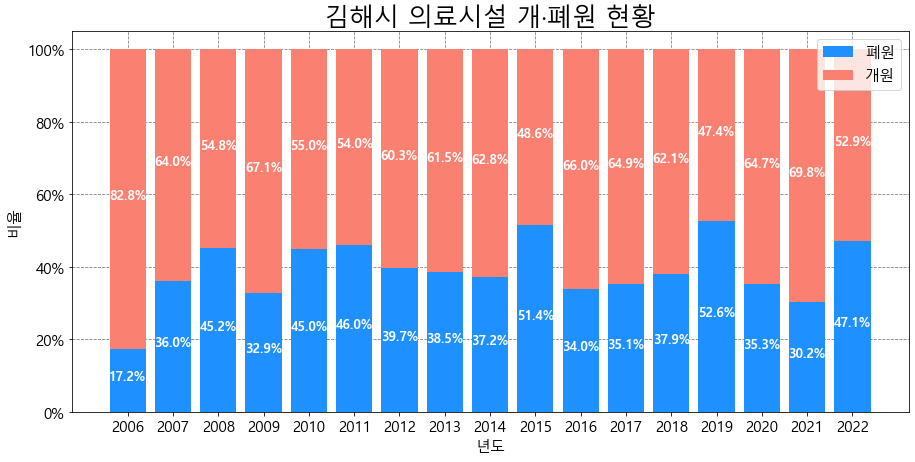

In [66]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

x = range(len(년도_list))
plt.bar(x, 폐, label='폐원', color='dodgerblue')
plt.bar(x, 개, bottom=폐, label='개원', color='salmon')
plt.legend()

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(년도_list)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])

plt.title('김해시 의료시설 개·폐원 현황', size = 25)
plt.xlabel('년도')
plt.ylabel('비율')

for i in range(len(x)):
    ax.text(x[i], 폐[i] / 2, str('{:.1f}%'.format(폐[i]*100)), fontsize = 13,
            horizontalalignment='center',weight ='bold', color = 'w')
    ax.text(x[i], (폐[i] + 폐[i] + 개[i])/ 2, str('{:.1f}%'.format(개[i]*100)), fontsize = 13,
            horizontalalignment='center',weight ='bold', color = 'w')

plt.show()

In [67]:
년도

{2006: 400,
 2007: 424,
 2008: 432,
 2009: 458,
 2010: 464,
 2011: 468,
 2012: 481,
 2013: 493,
 2014: 504,
 2015: 503,
 2016: 519,
 2017: 530,
 2018: 537,
 2019: 535,
 2020: 545,
 2021: 562,
 2022: 563}

In [68]:
년도_df = pd.Series(년도)

In [69]:
년도_df = pd.DataFrame(년도_df)

In [70]:
년도_df

0
2006  400
2007  424
2008  432
2009  458
2010  464
2011  468
2012  481
2013  493
2014  504
2015  503
2016  519
2017  530
2018  537
2019  535
2020  545
2021  562
2022  563

In [72]:
년도_df.rename(columns={0:'민간기관'})

민간기관
2006   400
2007   424
2008   432
2009   458
2010   464
2011   468
2012   481
2013   493
2014   504
2015   503
2016   519
2017   530
2018   537
2019   535
2020   545
2021   562
2022   563

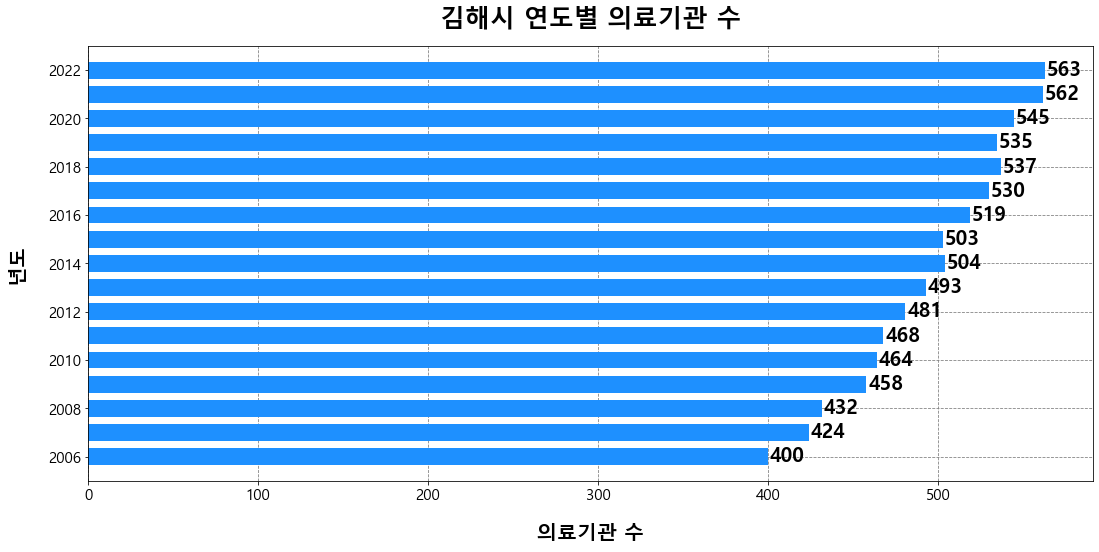

In [71]:
f, ax = plt.subplots(figsize=(18, 8), facecolor='w')
plt.rc('font', size=20)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

x = 년도_df.index
y = 년도_df[0]

bar = plt.barh(x, y, color='dodgerblue', height=0.7)


# for rect in bar:
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width()/2.0, height-1, '%.0f' % height, 
#              ha='center', va='bottom', size = 15,fontweight = 'bold')

for p in bar.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width+1.02, y+height/2, "%.0f" %(width), va='center', size = 20,fontweight = 'bold')

plt.title('김해시 연도별 의료기관 수', size=25, pad=20, fontweight = 'bold')
plt.xlabel('의료기관 수', labelpad=20, size=20, weight ='bold')
plt.ylabel('년도', labelpad=20, size=20, weight ='bold')
# plt.xticks(rotation=90)
# plt.xlim(0,250)
plt.ylim(2005,2023, 1)
# plt.grid(True)

plt.show()

In [32]:
os.listdir(원본)

['2020년 사회조사 결과 보도자료 통계표.xlsx',
 '[통합 문서1]업종코드',
 '건강보험심사평가원_요양기관 개설 현황_20211231.csv',
 '건강보험심사평가원_전국 병의원 및 약국 현황_20220630',
 '결론',
 '경상남도 김해시_인구 및 세대 현황_20220731.csv',
 '경상남도_김해시_주정차금지(지정)구역_20220615.csv',
 '경상남도_의료기관 현황_20211019.csv',
 '공공의료기관.csv',
 '김해',
 '우편번호_DB',
 '응급의료기관.csv',
 '의료기관',
 '의료기관종사_의료인력_20221019133850.csv',
 '의료서비스_불만사항_성_행정구역_연령·교육정도·혼인상태별__20221011153627.csv',
 '의료시설의_의료서비스_만족도_및_불만이유_20221125135831.csv',
 '장비현황상세',
 '장애인,외국인',
 '전국_의료인력_현황_20221031102340.csv',
 '지역화폐',
 '한국행정구역분류_행정동코드(7자리)21년.csv',
 '한국행정구역분류_행정동코드(7자리)_20210701기준.xlsx',
 '행정구역_시군구_별__성별_인구수_20221017110605.csv',
 '행정구역_시군구_별__성별_인구수_20221031094943.csv',
 '행정동별_의료기관수.csv']

In [33]:
불만 = pd.read_csv(원본 + '의료서비스_불만사항_성_행정구역_연령·교육정도·혼인상태별__20221011153627.csv', encoding='cp949',header=1)

In [34]:
불만 = 불만[불만['성별'] == '전체']

In [35]:
불만

성별 행정구역별 연령·교육정도·혼인상태별   불친절  의료비가비쌈  치료결과미흡  진료가불성실  진료대기입원대기시간이 길다  \
0   전체  경상남도            전체   9.7    21.0    20.2     5.5            23.9   
1   전체  경상남도        13~19세   0.0    30.2    36.7    33.1             0.0   
2   전체  경상남도        20~29세   6.0    33.1    28.6     9.1            16.1   
3   전체  경상남도        30~39세  19.0    20.0    19.0    11.5             8.5   
4   전체  경상남도        40~49세  10.8     3.9    27.3     8.5            22.7   
5   전체  경상남도        50~59세   9.4    18.7    18.8     0.0            33.6   
6   전체  경상남도        60세 이상   7.1    28.4    13.9     3.2            26.5   
7   전체  경상남도          초졸이하   0.0    21.0    18.4     4.2            18.5   
8   전체  경상남도            중졸  10.9    30.4     8.7     0.0            43.3   
9   전체  경상남도            고졸   8.2    22.2    23.7     4.7            17.7   
10  전체  경상남도          대졸이상  14.0    15.5    22.0     9.1            24.0   
11  전체  경상남도            미혼  10.4    23.1    40.1     8.0            15.0   
12  전체  경상남도            기혼   9.6    20.4    14.9     4.8            26.3   

    의료시설이낙후되거나미비  과잉진료  전문의료인이부족  집에서 의료 기관까지 거리가 멀다   기타  
0            3.9   7.0       2.2                 6.7  0.0  
1            0.0   0.0       0.0                 0.0  0.0  
2            0.0   7.3       0.0                 0.0  0.0  
3           11.9  10.1       0.0                 0.0  0.0  
4            5.5   3.2       4.2                13.8  0.0  
5            4.4   7.9       3.8                 3.4  0.0  
6            0.0   6.9       1.5                12.5  0.0  
7            0.0   7.0       0.0                30.9  0.0  
8            0.0   4.2       0.0                 2.5  0.0  
9            6.3   9.3       4.1                 3.7  0.0  
10           4.1   5.7       1.8                 3.8  0.0  
11           0.0   3.4       0.0                 0.0  0.0  
12           4.9   7.9       2.8                 8.4  0.0

In [36]:
불만.drop(['성별','행정구역별'], axis=1, inplace=True)

In [37]:
#불만.set_index('연령·교육정도·혼인상태별', inplace=True)

In [38]:
불만

연령·교육정도·혼인상태별   불친절  의료비가비쌈  치료결과미흡  진료가불성실  진료대기입원대기시간이 길다  의료시설이낙후되거나미비  \
0             전체   9.7    21.0    20.2     5.5            23.9           3.9   
1         13~19세   0.0    30.2    36.7    33.1             0.0           0.0   
2         20~29세   6.0    33.1    28.6     9.1            16.1           0.0   
3         30~39세  19.0    20.0    19.0    11.5             8.5          11.9   
4         40~49세  10.8     3.9    27.3     8.5            22.7           5.5   
5         50~59세   9.4    18.7    18.8     0.0            33.6           4.4   
6         60세 이상   7.1    28.4    13.9     3.2            26.5           0.0   
7           초졸이하   0.0    21.0    18.4     4.2            18.5           0.0   
8             중졸  10.9    30.4     8.7     0.0            43.3           0.0   
9             고졸   8.2    22.2    23.7     4.7            17.7           6.3   
10          대졸이상  14.0    15.5    22.0     9.1            24.0           4.1   
11            미혼  10.4    23.1    40.1     8.0            15.0           0.0   
12            기혼   9.6    20.4    14.9     4.8            26.3           4.9   

    과잉진료  전문의료인이부족  집에서 의료 기관까지 거리가 멀다   기타  
0    7.0       2.2                 6.7  0.0  
1    0.0       0.0                 0.0  0.0  
2    7.3       0.0                 0.0  0.0  
3   10.1       0.0                 0.0  0.0  
4    3.2       4.2                13.8  0.0  
5    7.9       3.8                 3.4  0.0  
6    6.9       1.5                12.5  0.0  
7    7.0       0.0                30.9  0.0  
8    4.2       0.0                 2.5  0.0  
9    9.3       4.1                 3.7  0.0  
10   5.7       1.8                 3.8  0.0  
11   3.4       0.0                 0.0  0.0  
12   7.9       2.8                 8.4  0.0

In [39]:
df = pd.DataFrame(불만.loc[0][1:])

In [40]:
df.reset_index(inplace=True)

In [41]:
df.drop(9, axis=0, inplace=True)

In [42]:
df = df.sort_values(0, ascending=False)

In [43]:
list(df[0])

[23.9, 21.0, 20.2, 9.7, 7.0, 6.7, 5.5, 3.9, 2.2]

In [44]:
list(df['index'])

['진료대기입원대기시간이 길다',
 '의료비가비쌈',
 '치료결과미흡',
 '불친절',
 '과잉진료',
 '집에서 의료 기관까지 거리가 멀다',
 '진료가불성실',
 '의료시설이낙후되거나미비',
 '전문의료인이부족']

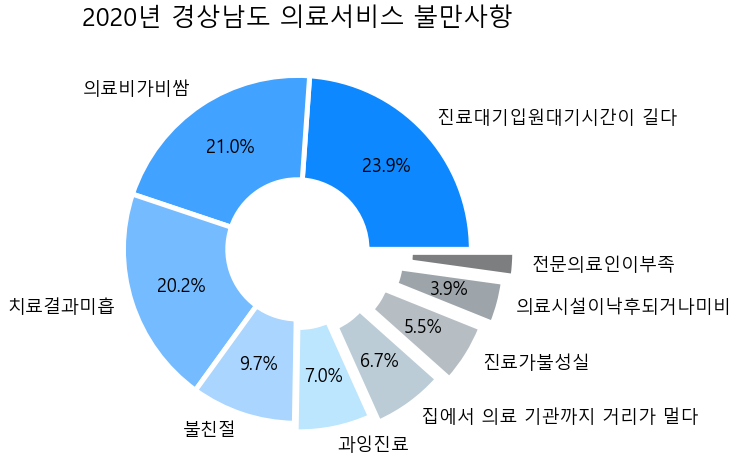

In [59]:
def customPct(pct) :
    return ('%.1f%%' % pct) if pct >= 3 else ''


f, ax = plt.subplots(figsize=(20, 8), facecolor='w')
plt.rc('font', size=15)
plt.title('2020년 경상남도 의료서비스 불만사항', size = 25)
wedgeprops = {'width': 0.6, 'linewidth': 5, 'edgecolor': 'w'}
plt.pie(list(df[0]), 
        labels = list(df['index']), 
        autopct=customPct,
        explode=[0, 0, 0, 0, 0.05, 0.1, 0.15, 0.2, 0.25],
        wedgeprops = wedgeprops, 
        pctdistance=0.7,
        textprops={'size': 18},
        colors = ['#0e88ff', '#42a2ff', '#75bbff', '#a9d5ff', '#bce5fe', '#bbccd6', '#b6bec4','#9ea5aa','#7c7e7f'])

#plt.legend(loc = (1, 0.5))
plt.show()

In [46]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [47]:
os.listdir(저장)

['년도별_병원수.csv',
 '년도별정리.csv',
 '의료기관.csv',
 '의료기관_법정동_행정동 - 복사본.csv',
 '의료기관_법정동_행정동.csv',
 '의료기관_영업중.csv',
 '의료기관_영업중_법정동_행정동.csv',
 '의료기관_영업중_진료과.csv',
 '의료기관_영업중_진료과_병합.csv',
 '의료기관_폐업.csv',
 '의료기관_폐업_법정동_행정동.csv']

In [48]:
의료기관_진료과 = pd.read_csv(저장 + '의료기관_영업중_진료과.csv', encoding='cp949')

In [49]:
진료과_list = list(의료기관_진료과.columns[43:])

In [50]:
진료과_list.sort()

In [51]:
print(진료과_list)

['가정의학과', '결핵과', '구강내과', '구강병리과', '구강악안면방사선과', '구강악안면외과', '내과', '마취통증의학과', '병리과', '보건소', '보건지소', '보건진료소', '비뇨의학과', '사상체질과', '산부인과', '성형외과', '소아청소년과', '소아치과', '신경과', '신경외과', '안과', '영상의학과', '영상치의학과', '예방의학과', '예방치과', '외과', '응급의학과', '이비인후과', '재활의학과', '정신건강의학과', '정형외과', '직업환경의학과', '진단검사의학과', '치과', '치과교정과', '치과보존과', '치과보철과', '치주과', '침구과', '통합치의학과', '피부과', '한방내과', '한방부인과', '한방소아과', '한방신경정신과', '한방안·이비인후·피부과', '한방응급과', '한방재활의학과', '흉부외과']


In [52]:
진료과 = 의료기관_진료과[진료과_list]

In [53]:
진료과_sum = 진료과.sum().sort_values(ascending=False)

In [54]:
f, ax = plt.subplots(figsize=(20, 8))
plt.rc('font', size=15)
plt.title('진료과', size=30)
진료과_sum.plot.bar(color='dodgerblue')
plt.grid(True)